# Predicting Heart Disease Using Machine Learning

This project looks to build a classification model to predict weather someone has a heart disease or not, based on mulitple medical attibutes

Approach

1. Problem definfation
2. Data
3. Evaluation metrics
4. Features of the data we're most focused on 
5. Modelling
6. Experimentation

## 1. Problem Defination

> Given clicncal parameters of a patient, can we predict whether or not they have heart disease?

In [2]:
# Preparing The Tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected spelling
import seaborn as sns

%matplotlib inline

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

##Model Evalations 
from sklearn.model_selection import train_test_split, cross_val_score
#Models To Tune Hyperparamters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV#
#Modules to Evaluate Perforamnce
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [3]:
df = pd.read_csv("heart-disease (2).csv")
df.shape

(303, 14)

# EDA: Exploratory Data Analysis

The goal is to find out more about your dataset

**EDA Checklist**

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
info = df.target.value_counts()
labels = list(info.index)
values = list(info.values)

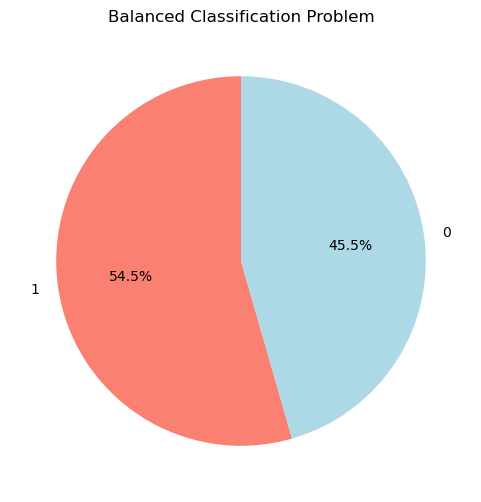

In [7]:
plt.figure(figsize=(6, 6)) 
plt.pie(values, labels = labels, startangle=90, shadow=False, colors = ["salmon", "lightblue"], autopct='%1.1f%%')
plt.title("Balanced Classification Problem")
plt.show();

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Gaining Intuition on The Data

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
##Compare Target Column with Sex Column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
##If the participant is a woman, theres about a 75% chance she has heart disease...
#Based on our existing dataset, there's a 75% chance she'll have heart disease.

#For -men around half the time, we can assumt ehty have data.
#WHen you average it out, aabout 64% chance they have heart disease...

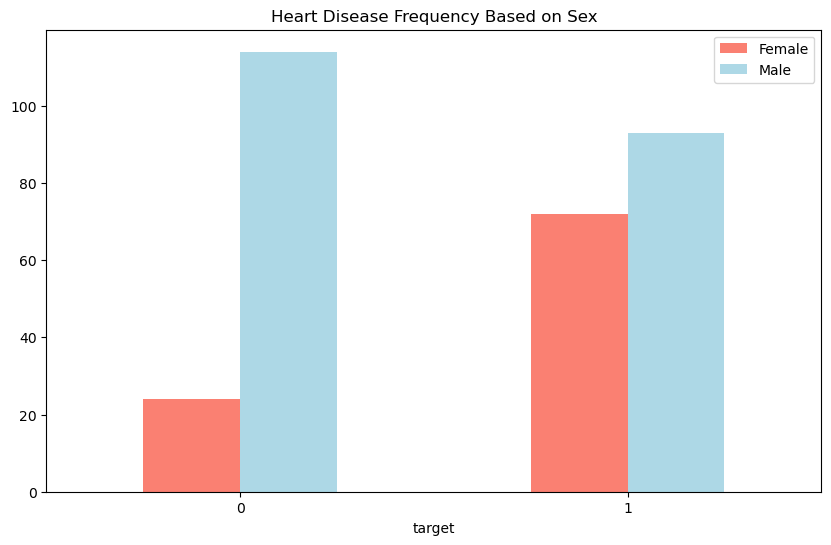

In [14]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), 
                                   color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency Based on Sex")
plt.legend(["Female", "Male"]) #THe index for legend has to be in the same chronology of the index in classificaiton
plt.xticks(rotation = 0)
plt.show()

# Comparing Independant Variables 

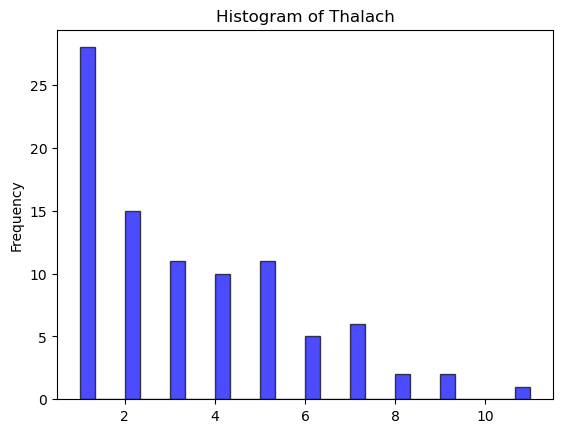

In [15]:
df["thalach"].value_counts().plot(kind="hist", bins=30, alpha=0.7, color="blue", edgecolor="black", title="Histogram of Thalach")
plt.show()

#To show the distribution of max heart rate

# Age vs Max Heart Rate FOr Heart Diseas

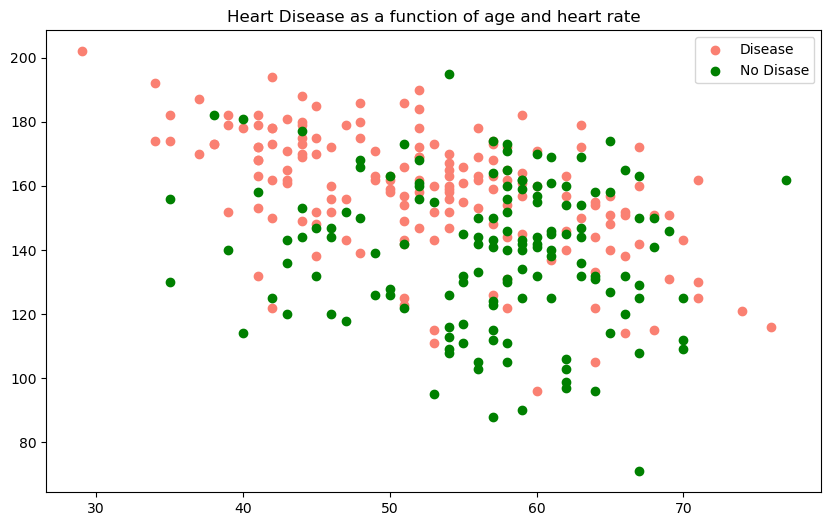

In [16]:
plt.figure(figsize = (10,6))

#Scatter With Positive Examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = "salmon")


##Scatter With negative Exaples 

plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = "green")
plt.title("Heart Disease as a function of age and heart rate")
plt.legend(["Disease", "No Disase"])
plt.show()




In [17]:
# Can't Really Decipher anything other than: As someone get's older their heart rate goes down

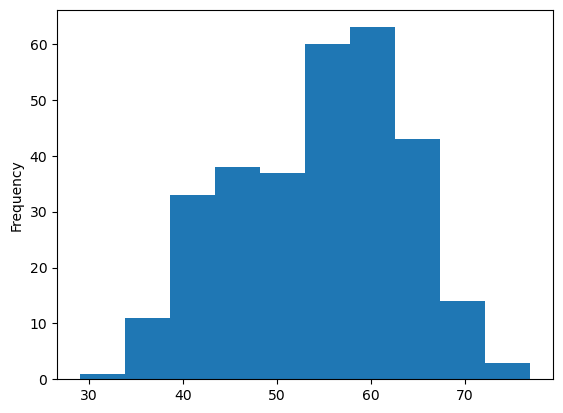

In [18]:
df.age.plot.hist()
plt.show()

# Does Chest Pain indiciate Heart Disease: 
**Frequency of heart Disease, based on chest pain**

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [20]:
# Percentage of People who Have Heart Disease Based on Type of Chest Pain

def percent_converter(positive, negative):
    return positive / (positive + negative)



In [21]:
new = pd.DataFrame(pd.crosstab(df.cp, df.target))
new_dict = new.to_dict(orient='index')
new_dict

{0: {0: 104, 1: 39}, 1: {0: 9, 1: 41}, 2: {0: 18, 1: 69}, 3: {0: 7, 1: 16}}

## This graphs shows the percentage of people who have a heart disease by chest type

Clear conlusion that as chest pain goes to one and up, the chances of heart disease sky rocket

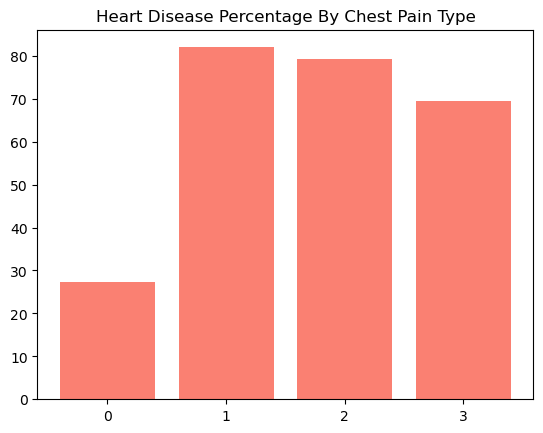

In [22]:
bar_dict = {}
for i in new_dict:
    a = list(new_dict[i].values())
    percent_positive = percent_converter(a[1], a[0])
    bar_dict[i] = percent_positive

#bar_dict.plot(kind = bar, colour = [salmon])
x = list(bar_dict.keys())
y = list(bar_dict.values())
y =[value * 100 for value in y]

plt.bar(x,y, color = ["salmon"])
plt.title("Heart Disease Percentage By Chest Pain Type" )
plt.xticks(ticks=x, labels=x, rotation = 0)
plt.show()

# Correlation Matrix

**How Each Independant Variable is Related To Each Other**

In [23]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


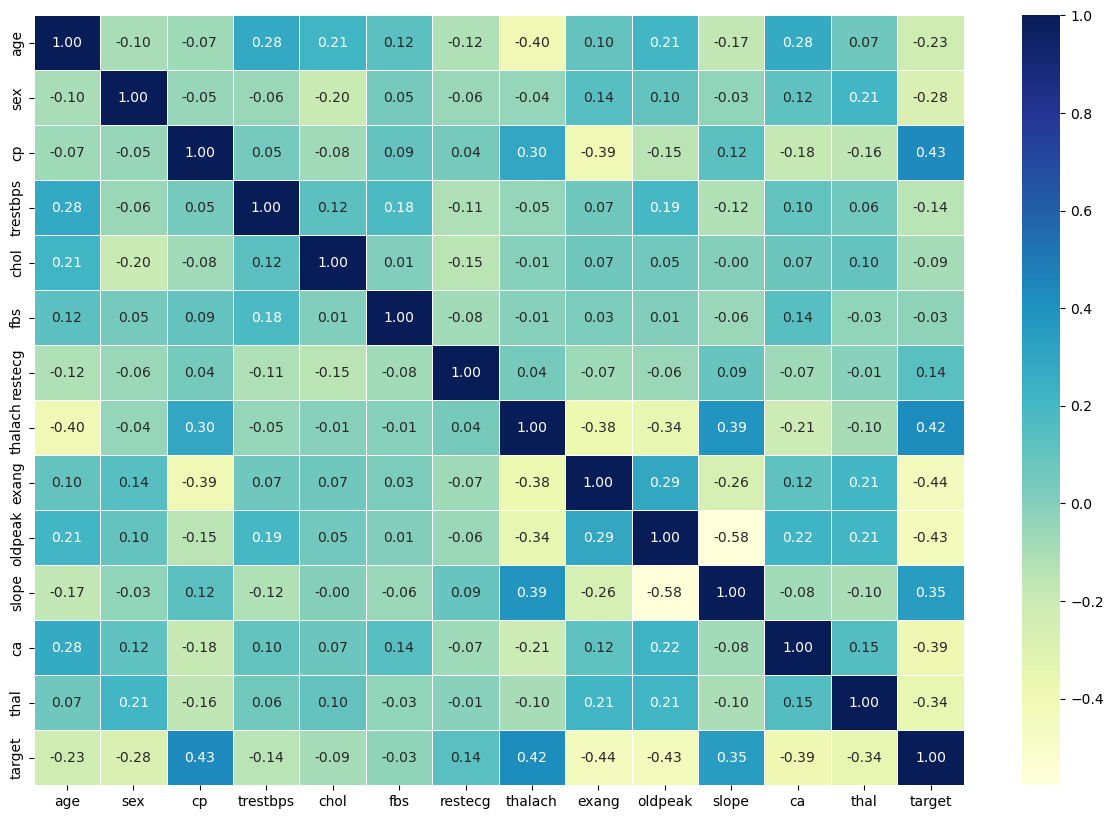

In [24]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths= 0.5, fmt = ".2f", cmap = "YlGnBu" )
plt.show()

Coefficent matrix to see, which factos impact the chances of heart disease the most

# Preparing Our Data For Machine Learning

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
x = df.drop("target", axis = 1)
y = df.target

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8)

#Building a Machine Learning Model

# Using the MAP TO Pick the Model

#Trying Out 3 Different Models for the Data

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

How to Find Stuff: Machine Learning Models for Classification Problems

In [27]:
#Put Models in a dict

models = {"Logistic Regression": LogisticRegression(max_iter=1000),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models.


In [28]:
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Function build to train and score different classification models on the heart diseas problem.
    Prevents rewriting all the code.
    models: dict of different Scikit-Learn machine learning models
    x_train, x_test, y_train, y_test
    """

    np.random.seed(0)
    #Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        #Evaluate THe Model and Append it's score to model score
        model_scores[name] = model.score(x_test, y_test)

    return model_scores
        



In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8)
scores = fit_score(models, x_train, x_test, y_train, y_test)
scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.7868852459016393}

# Comparing The Models Visually

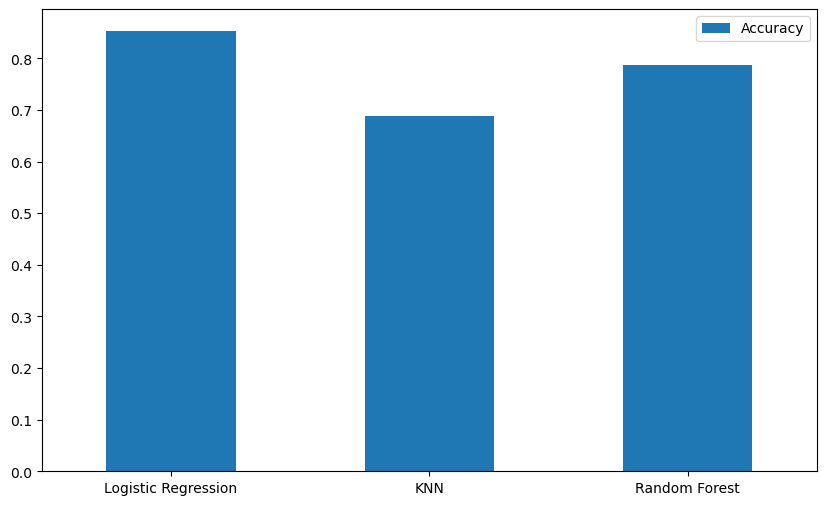

In [30]:
model_compare = pd.DataFrame(scores, index = ["Accuracy"])
#plt.figure(figsize= (10,10))
model_compare.T.plot(kind = "bar",  figsize=(10, 6))
plt.xticks(rotation =0)
plt.show()

**Now We Have Baaseline Model. Time For Hyperparamter Tuning**

What We're Testing: 

1. Hypyterparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

# Trying Hyper Parameter Tuning By Hand

In [31]:
##Let's Tune KNN

train_score = []
test_scores = []

neighbours = range(1,21)

knn=  KNeighborsClassifier()
#Loop through different n_neighbours

for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

print(max(test_scores))

0.7049180327868853


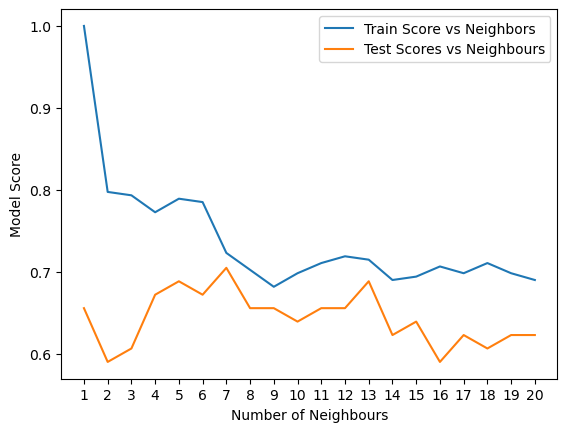

In [32]:
plt.plot(neighbours, train_score, label = "Train Score vs Neighbors")
plt.plot(neighbours, test_scores, label = "Test Scores vs Neighbours")
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.show()


# Discard KNN

# Using RandomSearchCV For Efficiency

In [33]:
#Create a Hyperparameter Grid For Logisitic Regression

# Hyperparameter Tuning With RandomizedSearchCV

In [34]:
log_tune_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#Hyperparamtergrid For RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [35]:
np.random.seed(0)

rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions= log_tune_grid, n_iter = 20, cv = 5, verbose = 0)
rs_log_reg.fit(x_train, y_train)
rs_log_reg.score(x_test, y_test)

0.8524590163934426

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [37]:
clf = RandomizedSearchCV(estimator= RandomForestClassifier(), param_distributions= rf_grid, n_iter = 5, cv = 5, verbose = 0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7868852459016393

In [38]:
clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [39]:
#None of Them Near 95%
scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.7868852459016393}

In [40]:
#Going to Push Logical Regression Framework

#GRIDSEARCHCV That exhasutively searches through hyperparamters 

In [41]:
##Hyperparamter Tuning using GridSearchCV

In [42]:
param_grid = [
    {
    'C' : np.logspace(-4,4,30),
    'solver': ['liblinear'],
}
]

In [43]:
model = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv = 5, verbose = True)
model.fit(x_train, y_train)
model.score(x_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8524590163934426

# Evaluating our Tuned Machine Learning Classifier

* ROC cruve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score 

... and it would be great if cross-validation was used where possible

In [44]:
y_preds = model.predict(x_test)
y_preds

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [45]:
y_test

257    0
169    0
64     1
215    0
184    0
      ..
37     1
14     1
301    0
178    0
2      1
Name: target, Length: 61, dtype: int64

**Evaluation Metrics Reminder**


#Modules to Evaluate Perforamnce

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay


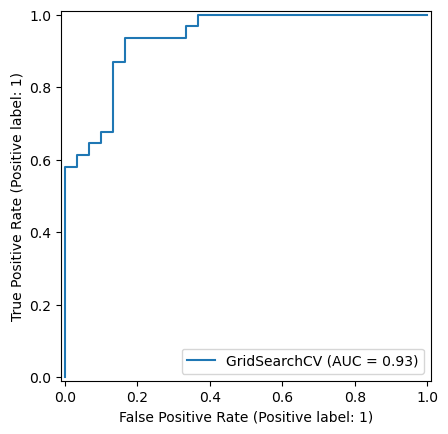

In [46]:
#Plot ROC Curve and AUC Score
from sklearn.metrics import roc_curve
y_true = y_test
y_preds = model.predict(x_test )


RocCurveDisplay.from_estimator(
   model, x_test, y_test)

plt.show()

In [47]:
print(confusion_matrix(y_test, y_preds))

[[26  4]
 [ 5 26]]


In [48]:
sns.set(font_scale=1.5)

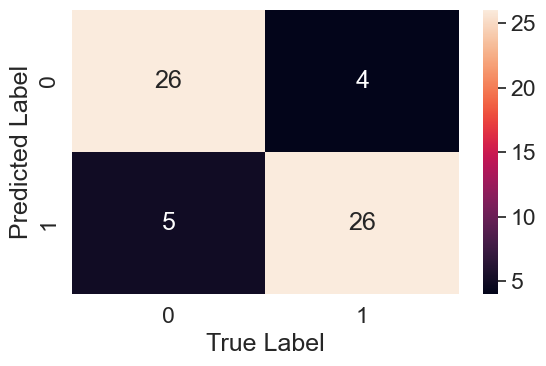

In [49]:
    def conf_matrix(y_test, y_preds):
        """
        Plots an Intuitive Confusion Matrix
        """
    
        fig, ax = plt.subplots(figsize = (6,4))
        ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                        annot = True)
                        
        plt.xlabel("True Label")
        plt.ylabel("Predicted Label")
        plt.tight_layout() 
        #ax.set_ylim(bottom + 0.5, top -0.5)
        plt.show()
    
    conf_matrix(y_test, y_preds)

Now we've got a ROC Curve, an AUC Metric, and a confusion Matrix

In [50]:
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.87      0.84      0.85        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Calculate Eval Metrics Using Cross Validation

Calculating Preciion, Recall, and f1-score of our model using cross-validation
using `cross_val_score()`

In [51]:
model.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [52]:
clf = LogisticRegression(C = 1.3738237958832638, solver = "liblinear")

In [53]:
#Cross Validated Metrics

cv_acc = cross_val_score(estimator = clf, X = x, y = y, scoring = "accuracy")
np.mean(cv_acc)

0.8215300546448088

In [54]:
cv_precision = cross_val_score(estimator = clf, X = x, y = y, cv = 5, scoring = "precision")
np.mean(cv_precision)

0.817900063251107

In [55]:
cv_recall = cross_val_score(estimator = clf, X = x, y = y, cv = 5, scoring = "recall")
np.mean(cv_recall)

0.8727272727272727

In [56]:
cv_f1 = cross_val_score(estimator = clf, X = x, y = y, cv = 5, scoring = "f1")
np.mean(cv_f1)

0.8431741323998502

visualizaing metrics

In [57]:
Metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc), "Precision": np.mean(cv_precision), "True Positive Rate": np.mean(cv_recall), 
                        "F1 Score": np.mean(cv_f1)}, index = [0])

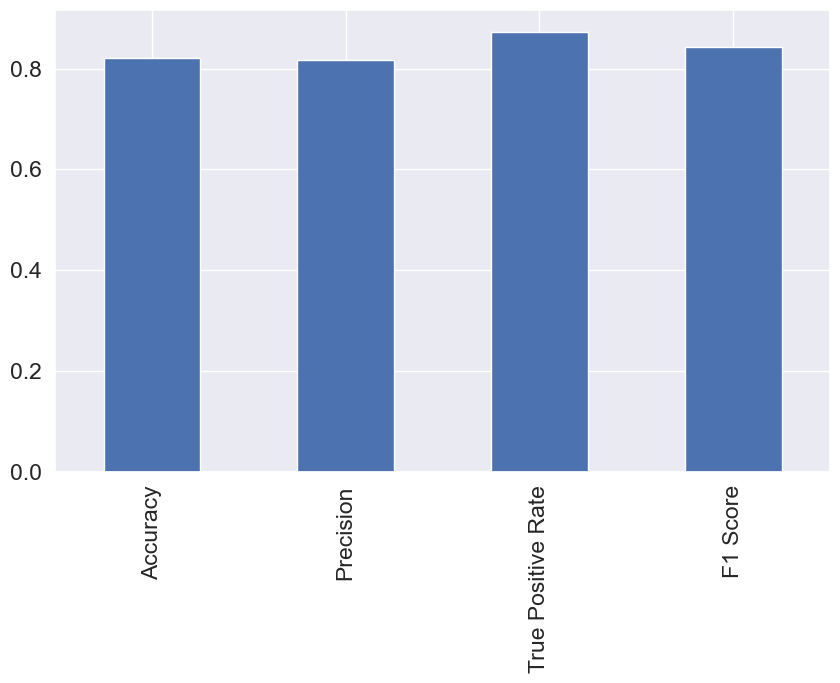

In [58]:
Metrics.T.plot(kind = "bar", figsize = (10,6), legend = False)
plt.show()

# Feature Importance

In [59]:
clf.fit(x_train, y_train)
clf.coef_

array([[-0.00250771, -1.56704302,  0.64021031, -0.01899792, -0.00364253,
         0.25878907,  0.57945088,  0.03510715, -0.79007851, -0.54831629,
         0.32267734, -0.70300747, -0.58795435]])

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
feature_dict = dict(zip(x.columns, list(clf.coef_[0]) ))
feature_dict

{'age': -0.002507713461859979,
 'sex': -1.5670430185284,
 'cp': 0.6402103096453678,
 'trestbps': -0.01899791809619842,
 'chol': -0.003642526610285436,
 'fbs': 0.25878906533584234,
 'restecg': 0.5794508777542704,
 'thalach': 0.035107145143389355,
 'exang': -0.7900785124404953,
 'oldpeak': -0.5483162924641668,
 'slope': 0.3226773423322076,
 'ca': -0.7030074749447585,
 'thal': -0.5879543483118822}

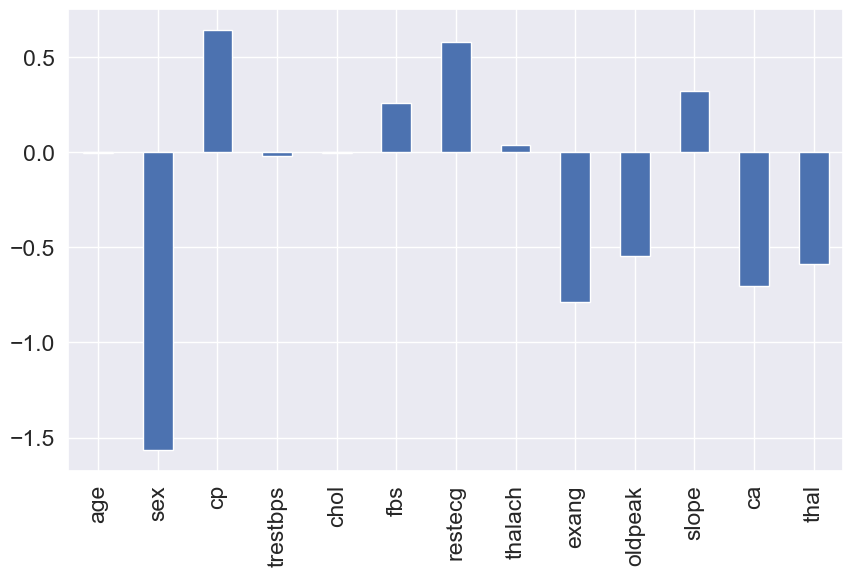

In [62]:
features_df = pd.DataFrame(feature_dict, index = [0])
features_df.T.plot(kind = "bar", figsize = (10,6), legend = False )
plt.show()